# Whether bumble bee do mental 3D constructions to achieve the visual-tactile crossmodal recognition? 
An investigation into a biomimic framework that learns latent representation for crossmodal 3D reconstruction RL-tasks via active visual/tactile exploration 

Zekai Xu, Fengzhe Zhang - 
Imperial College London

# PreTraining

## Drive Mount
Original Repository from Github: git clone https://github.com/facebookresearch/Active-3D-Vision-and-Touch.git

The Modified Repository _ Google Drive Link: https://drive.google.com/drive/folders/1sv0n-2IIsGhgTlr6i6e5WS83lBSjnzif?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Import & Setup


### conda

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [1]:
!conda --version

conda 4.14.0


In [2]:
%cd /content/gdrive/MyDrive/Active-3D-Vision-and-Touch/

/content/gdrive/MyDrive/Active-3D-Vision-and-Touch


### requirements Install

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/skoch9/meshplot.git (to revision 725e4a7926a5f10888f0edd1762fecf9db751c56) to /tmp/pip-install-loh28ewx/meshplot_5e43e51f3dfc463c9a8a916d0c7ce8f4
  Running command git clone --filter=blob:none --quiet https://github.com/skoch9/meshplot.git /tmp/pip-install-loh28ewx/meshplot_5e43e51f3dfc463c9a8a916d0c7ce8f4
  Running command git rev-parse -q --verify 'sha^725e4a7926a5f10888f0edd1762fecf9db751c56'
  Running command git fetch -q https://github.com/skoch9/meshplot.git 725e4a7926a5f10888f0edd1762fecf9db751c56
  Resolved https://github.com/skoch9/meshplot.git to commit 725e4a7926a5f10888f0edd1762fecf9db751c56
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 8

### pretained models and datasets

In [ ]:
#!bash download_models.sh

In [ ]:
#!bash download_data.sh

## DDQN - Training

In [4]:
!pip install submitit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.12.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 36.3 MB/s eta 0:00:00
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61263 sha256=50551e94b100d9b17737078a996457babd9809d2ba7c4707112e0e56bfe6e70f
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=67e24aedc3c2732c52b98d8e0df22d6435aacfa79c35374e562108ec9bc063ff
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built fvcore iopath
Looking in links:

In [6]:
!pip install torch
import torch
!pip install trimesh
!pip install pyrender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip3 install pybullet --upgrade
!pip3 install stable_baselines --upgrade
!pip3 install tensorflow #tensorflow deprecates and breaks their API
#see PyBullet Quickstart Guide at
#https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit
import imageio
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.9/719.9 kB 45.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.2 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.1-py3-none-any.whl size=826190 sha256=375469364da0dc083669f385f0ef26f5836cb5de234a81e90c219eb56eed3f86
  Stored in directory: /root/.cache/p

In [ ]:

!pip uninstall tensorboard
!pip uninstall tensorflow
!pip uninstall tensorboard
!pip uninstall tensorboardx
!pip uninstall tensorboard-plugin-wit
!pip uninstall cloud-tpu-client

!pip install tensorboard


In [8]:
from tensorboard import version
print(version.VERSION)

2.10.0


## Simulation Check

In [10]:
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
/content/gdrive/MyDrive/Active-3D-Vision-and-Touch/pterotactyl/simulator/scene/instance.py:278: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  frame = {"pos": torch.FloatTensor(positions), "rot_M": torch.FloatTensor(rots)}


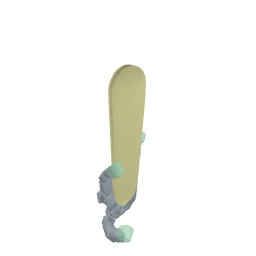

/content/gdrive/MyDrive/Active-3D-Vision-and-Touch/pterotactyl/objects/test_objects/1


In [11]:
import os
from PIL import Image
from pterotactyl.simulator.scene import sampler
from pterotactyl.simulator.physics import grasping
import pterotactyl.objects as objects

OBJ_LOCATION = os.path.join(os.path.dirname(objects.__file__), "test_objects/1")
batch = [OBJ_LOCATION]
s = sampler.Sampler(grasping.Agnostic_Grasp, bs=1, vision=True, resolution = [256, 256])
s.load_objects(batch, from_dataset=False, scale = 2.6)

action = [30]
parameters = [[[.3, .3, .3], [60, 0, 135]]]
signals = s.sample(action, touch=True, touch_point_cloud=False, vision=True, vision_occluded=True,parameters=parameters )

img_vision_grasp = Image.fromarray(signals["vision_occluded"][0])
display(img_vision_grasp)

print(OBJ_LOCATION)

# AutoEncoder

## AutoEncoder_Training Touch(Poking)


Here we train the autoencoder model in the touch only poking setting. This learns a latent space over the object predictions from the pretrained object prediction model in this setting.

In [13]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.reconstruction.autoencoder import train as auto_train 
from pterotactyl import pretrained

VISION_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/vision/t_p/'

class Params: # define training arguments 
    def __init__(self):
        self.cut = 0.33
        self.seed = 0 
        self.limit_data = True
        self.epochs = 5
        self.lr = 0.0003
        self.eval = False
        self.batch_size = 32
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_id = "touch_false_img_true"
        self.exp_type = "test_fun"
        self.patience = 10
        self.finger = True 
        self.num_grasps = 5 
        self.hidden_GCN_size = 100
        self.num_GCN_layers = 5
        self.use_touch = True # using touch 
        self.use_img = False # not using vision 
        self.val_grasps = -1
        self.encoding_size = 50
        self.vision_location = VISION_LOCATION



params = Params()
auto_trainer = auto_train.Engine(params)
auto_trainer()

/usr/local/lib/python3.7/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|██████████| 2000/2000 [07:23<00:00,  4.51it/s] 
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


The number of auto_train set objects found : 557


100%|██████████| 2000/2000 [00:00<00:00, 2115.16it/s]


The number of valid set objects found : 745


  6%|▌         | 1/18 [00:34<09:45, 34.45s/it]

Train || Epoch: 0, loss: 24.62, b_ptp:  10000.00


 11%|█         | 2/18 [00:34<04:38, 17.40s/it]

Train || Epoch: 0, loss: 23.44, b_ptp:  10000.00


 17%|█▋        | 3/18 [00:35<02:55, 11.70s/it]

Train || Epoch: 0, loss: 26.61, b_ptp:  10000.00


 22%|██▏       | 4/18 [00:35<02:03,  8.85s/it]

Train || Epoch: 0, loss: 24.64, b_ptp:  10000.00


 28%|██▊       | 5/18 [00:35<01:32,  7.14s/it]

Train || Epoch: 0, loss: 29.41, b_ptp:  10000.00


 33%|███▎      | 6/18 [00:36<01:12,  6.00s/it]

Train || Epoch: 0, loss: 26.09, b_ptp:  10000.00


 39%|███▉      | 7/18 [00:36<00:57,  5.19s/it]

Train || Epoch: 0, loss: 28.83, b_ptp:  10000.00


 44%|████▍     | 8/18 [00:36<00:45,  4.58s/it]

Train || Epoch: 0, loss: 23.21, b_ptp:  10000.00


 50%|█████     | 9/18 [00:36<00:36,  4.11s/it]

Train || Epoch: 0, loss: 28.16, b_ptp:  10000.00


 56%|█████▌    | 10/18 [00:37<00:29,  3.72s/it]

Train || Epoch: 0, loss: 34.35, b_ptp:  10000.00


 61%|██████    | 11/18 [00:37<00:23,  3.41s/it]

Train || Epoch: 0, loss: 25.68, b_ptp:  10000.00


 67%|██████▋   | 12/18 [00:37<00:18,  3.15s/it]

Train || Epoch: 0, loss: 40.13, b_ptp:  10000.00


 72%|███████▏  | 13/18 [00:38<00:14,  2.94s/it]

Train || Epoch: 0, loss: 24.37, b_ptp:  10000.00


 78%|███████▊  | 14/18 [00:38<00:10,  2.75s/it]

Train || Epoch: 0, loss: 30.80, b_ptp:  10000.00


 83%|████████▎ | 15/18 [00:38<00:07,  2.59s/it]

Train || Epoch: 0, loss: 26.83, b_ptp:  10000.00


 89%|████████▉ | 16/18 [00:39<00:04,  2.44s/it]

Train || Epoch: 0, loss: 31.33, b_ptp:  10000.00


100%|██████████| 18/18 [00:39<00:00,  2.21s/it]

Train || Epoch: 0, loss: 29.33, b_ptp:  10000.00
Train || Epoch: 0, loss: 18.91, b_ptp:  10000.00


100%|██████████| 24/24 [00:27<00:00,  1.16s/it]


Valid || Epoch: 0, train loss: 27.5954, val loss: 28.1458, b_ptp:  10000.0000
*******************************************************
Validation Accuracy: 28.145835876464844
*******************************************************
Saving with 9971.854 improvement in Chamfer Distance on Validation Set 


  6%|▌         | 1/18 [00:20<05:40, 20.05s/it]

Train || Epoch: 1, loss: 26.45, b_ptp:  28.15


 11%|█         | 2/18 [00:35<04:45, 17.84s/it]

Train || Epoch: 1, loss: 24.98, b_ptp:  28.15


 17%|█▋        | 3/18 [00:45<03:46, 15.08s/it]

Train || Epoch: 1, loss: 17.52, b_ptp:  28.15


 22%|██▏       | 4/18 [00:45<02:39, 11.38s/it]

Train || Epoch: 1, loss: 22.52, b_ptp:  28.15


 28%|██▊       | 5/18 [00:45<01:59,  9.17s/it]

Train || Epoch: 1, loss: 33.02, b_ptp:  28.15


 33%|███▎      | 6/18 [00:46<01:32,  7.69s/it]

Train || Epoch: 1, loss: 23.26, b_ptp:  28.15


 39%|███▉      | 7/18 [00:46<01:13,  6.64s/it]

Train || Epoch: 1, loss: 30.57, b_ptp:  28.15


 44%|████▍     | 8/18 [00:46<00:58,  5.85s/it]

Train || Epoch: 1, loss: 27.74, b_ptp:  28.15


 50%|█████     | 9/18 [00:47<00:47,  5.23s/it]

Train || Epoch: 1, loss: 23.85, b_ptp:  28.15


 56%|█████▌    | 10/18 [00:47<00:37,  4.74s/it]

Train || Epoch: 1, loss: 34.74, b_ptp:  28.15


 61%|██████    | 11/18 [00:47<00:30,  4.33s/it]

Train || Epoch: 1, loss: 26.89, b_ptp:  28.15


 67%|██████▋   | 12/18 [00:47<00:23,  4.00s/it]

Train || Epoch: 1, loss: 26.07, b_ptp:  28.15


 72%|███████▏  | 13/18 [00:48<00:18,  3.71s/it]

Train || Epoch: 1, loss: 21.64, b_ptp:  28.15


 78%|███████▊  | 14/18 [00:48<00:13,  3.47s/it]

Train || Epoch: 1, loss: 22.39, b_ptp:  28.15


 83%|████████▎ | 15/18 [00:48<00:09,  3.26s/it]

Train || Epoch: 1, loss: 21.53, b_ptp:  28.15


 89%|████████▉ | 16/18 [00:49<00:06,  3.07s/it]

Train || Epoch: 1, loss: 23.76, b_ptp:  28.15


100%|██████████| 18/18 [00:49<00:00,  2.76s/it]

Train || Epoch: 1, loss: 31.54, b_ptp:  28.15
Train || Epoch: 1, loss: 25.95, b_ptp:  28.15


100%|██████████| 24/24 [00:25<00:00,  1.05s/it]


Valid || Epoch: 1, train loss: 25.8005, val loss: 25.3439, b_ptp:  28.1458
*******************************************************
Validation Accuracy: 25.343936920166016
*******************************************************
Saving with 2.802 improvement in Chamfer Distance on Validation Set 


  6%|▌         | 1/18 [00:22<06:24, 22.64s/it]

Train || Epoch: 2, loss: 21.73, b_ptp:  25.34


 11%|█         | 2/18 [00:22<03:03, 11.49s/it]

Train || Epoch: 2, loss: 18.82, b_ptp:  25.34


 17%|█▋        | 3/18 [00:23<01:56,  7.77s/it]

Train || Epoch: 2, loss: 25.53, b_ptp:  25.34


 22%|██▏       | 4/18 [00:23<01:22,  5.90s/it]

Train || Epoch: 2, loss: 25.34, b_ptp:  25.34


 28%|██▊       | 5/18 [00:23<01:02,  4.78s/it]

Train || Epoch: 2, loss: 15.68, b_ptp:  25.34


 33%|███▎      | 6/18 [00:24<00:48,  4.04s/it]

Train || Epoch: 2, loss: 23.17, b_ptp:  25.34


 39%|███▉      | 7/18 [00:24<00:38,  3.50s/it]

Train || Epoch: 2, loss: 24.51, b_ptp:  25.34


 44%|████▍     | 8/18 [00:24<00:31,  3.11s/it]

Train || Epoch: 2, loss: 22.59, b_ptp:  25.34


 50%|█████     | 9/18 [00:25<00:25,  2.80s/it]

Train || Epoch: 2, loss: 28.23, b_ptp:  25.34


 56%|█████▌    | 10/18 [00:25<00:20,  2.55s/it]

Train || Epoch: 2, loss: 18.96, b_ptp:  25.34


 61%|██████    | 11/18 [00:25<00:16,  2.34s/it]

Train || Epoch: 2, loss: 24.69, b_ptp:  25.34


 67%|██████▋   | 12/18 [00:26<00:13,  2.17s/it]

Train || Epoch: 2, loss: 23.95, b_ptp:  25.34


 72%|███████▏  | 13/18 [00:26<00:10,  2.03s/it]

Train || Epoch: 2, loss: 17.24, b_ptp:  25.34


 78%|███████▊  | 14/18 [00:26<00:07,  1.91s/it]

Train || Epoch: 2, loss: 17.74, b_ptp:  25.34


 83%|████████▎ | 15/18 [00:27<00:05,  1.80s/it]

Train || Epoch: 2, loss: 21.95, b_ptp:  25.34


 89%|████████▉ | 16/18 [00:27<00:03,  1.71s/it]

Train || Epoch: 2, loss: 20.91, b_ptp:  25.34


100%|██████████| 18/18 [00:27<00:00,  1.54s/it]

Train || Epoch: 2, loss: 21.61, b_ptp:  25.34
Train || Epoch: 2, loss: 11.38, b_ptp:  25.34


100%|██████████| 24/24 [00:25<00:00,  1.06s/it]


Valid || Epoch: 2, train loss: 21.3352, val loss: 19.7467, b_ptp:  25.3439
*******************************************************
Validation Accuracy: 19.746726989746094
*******************************************************
Saving with 5.597 improvement in Chamfer Distance on Validation Set 


  6%|▌         | 1/18 [00:14<04:12, 14.85s/it]

Train || Epoch: 3, loss: 18.05, b_ptp:  19.75


 11%|█         | 2/18 [00:15<02:04,  7.79s/it]

Train || Epoch: 3, loss: 19.08, b_ptp:  19.75


 17%|█▋        | 3/18 [00:16<01:20,  5.38s/it]

Train || Epoch: 3, loss: 17.21, b_ptp:  19.75


 22%|██▏       | 4/18 [00:16<00:57,  4.14s/it]

Train || Epoch: 3, loss: 13.26, b_ptp:  19.75


 28%|██▊       | 5/18 [00:16<00:43,  3.38s/it]

Train || Epoch: 3, loss: 18.15, b_ptp:  19.75


 33%|███▎      | 6/18 [00:17<00:34,  2.87s/it]

Train || Epoch: 3, loss: 24.31, b_ptp:  19.75


 39%|███▉      | 7/18 [00:17<00:27,  2.51s/it]

Train || Epoch: 3, loss: 14.36, b_ptp:  19.75


 44%|████▍     | 8/18 [00:17<00:22,  2.24s/it]

Train || Epoch: 3, loss: 18.34, b_ptp:  19.75


 50%|█████     | 9/18 [00:18<00:18,  2.02s/it]

Train || Epoch: 3, loss: 17.68, b_ptp:  19.75


 56%|█████▌    | 10/18 [00:19<00:15,  1.96s/it]

Train || Epoch: 3, loss: 15.39, b_ptp:  19.75


 61%|██████    | 11/18 [00:19<00:12,  1.81s/it]

Train || Epoch: 3, loss: 18.20, b_ptp:  19.75


 67%|██████▋   | 12/18 [00:20<00:10,  1.68s/it]

Train || Epoch: 3, loss: 19.10, b_ptp:  19.75


 72%|███████▏  | 13/18 [00:20<00:07,  1.58s/it]

Train || Epoch: 3, loss: 13.12, b_ptp:  19.75


 78%|███████▊  | 14/18 [00:20<00:05,  1.49s/it]

Train || Epoch: 3, loss: 15.02, b_ptp:  19.75


 83%|████████▎ | 15/18 [00:21<00:04,  1.41s/it]

Train || Epoch: 3, loss: 12.45, b_ptp:  19.75


 89%|████████▉ | 16/18 [00:21<00:02,  1.34s/it]

Train || Epoch: 3, loss: 11.82, b_ptp:  19.75


100%|██████████| 18/18 [00:21<00:00,  1.22s/it]

Train || Epoch: 3, loss: 16.43, b_ptp:  19.75
Train || Epoch: 3, loss: 14.12, b_ptp:  19.75


100%|██████████| 24/24 [00:25<00:00,  1.06s/it]


Valid || Epoch: 3, train loss: 16.4494, val loss: 15.4470, b_ptp:  19.7467
*******************************************************
Validation Accuracy: 15.447016716003418
*******************************************************
Saving with 4.300 improvement in Chamfer Distance on Validation Set 


  6%|▌         | 1/18 [00:16<04:41, 16.56s/it]

Train || Epoch: 4, loss: 11.57, b_ptp:  15.45


 11%|█         | 2/18 [00:16<02:15,  8.46s/it]

Train || Epoch: 4, loss: 11.03, b_ptp:  15.45


 17%|█▋        | 3/18 [00:17<01:26,  5.77s/it]

Train || Epoch: 4, loss: 18.10, b_ptp:  15.45


 22%|██▏       | 4/18 [00:17<01:01,  4.41s/it]

Train || Epoch: 4, loss: 12.37, b_ptp:  15.45


 28%|██▊       | 5/18 [00:17<00:46,  3.59s/it]

Train || Epoch: 4, loss: 16.04, b_ptp:  15.45


 33%|███▎      | 6/18 [00:18<00:36,  3.04s/it]

Train || Epoch: 4, loss: 11.55, b_ptp:  15.45


 39%|███▉      | 7/18 [00:18<00:29,  2.65s/it]

Train || Epoch: 4, loss: 10.41, b_ptp:  15.45


 44%|████▍     | 8/18 [00:18<00:23,  2.36s/it]

Train || Epoch: 4, loss: 12.52, b_ptp:  15.45


 50%|█████     | 9/18 [00:19<00:19,  2.13s/it]

Train || Epoch: 4, loss: 9.40, b_ptp:  15.45


 56%|█████▌    | 10/18 [00:19<00:15,  1.95s/it]

Train || Epoch: 4, loss: 15.71, b_ptp:  15.45


 61%|██████    | 11/18 [00:19<00:12,  1.80s/it]

Train || Epoch: 4, loss: 15.64, b_ptp:  15.45


 67%|██████▋   | 12/18 [00:20<00:10,  1.68s/it]

Train || Epoch: 4, loss: 12.38, b_ptp:  15.45


 72%|███████▏  | 13/18 [00:20<00:07,  1.57s/it]

Train || Epoch: 4, loss: 13.83, b_ptp:  15.45


 78%|███████▊  | 14/18 [00:20<00:05,  1.48s/it]

Train || Epoch: 4, loss: 10.94, b_ptp:  15.45


 83%|████████▎ | 15/18 [00:21<00:04,  1.40s/it]

Train || Epoch: 4, loss: 11.63, b_ptp:  15.45


 89%|████████▉ | 16/18 [00:21<00:02,  1.33s/it]

Train || Epoch: 4, loss: 10.78, b_ptp:  15.45


100%|██████████| 18/18 [00:21<00:00,  1.21s/it]

Train || Epoch: 4, loss: 14.96, b_ptp:  15.45
Train || Epoch: 4, loss: 14.95, b_ptp:  15.45


100%|██████████| 24/24 [00:25<00:00,  1.07s/it]

Valid || Epoch: 4, train loss: 12.9907, val loss: 12.2985, b_ptp:  15.4470
*******************************************************
Validation Accuracy: 12.298462867736816
*******************************************************
Saving with 3.149 improvement in Chamfer Distance on Validation Set 


In [ ]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.reconstruction.autoencoder import train as auto_train 
from pterotactyl import pretrained

VISION_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/vision/t_p/'

class Params: # define training arguments 
    def __init__(self):
        self.cut = 0.33
        self.seed = 0 
        self.limit_data = True
        self.epochs = 3
        self.lr = 0.0003
        self.eval = False
        self.batch_size = 32
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_id = "0101"
        self.exp_type = "test_fun"
        self.patience = 10
        self.finger = True 
        self.num_grasps = 5 
        self.hidden_GCN_size = 100
        self.num_GCN_layers = 5
        self.use_touch = True # using touch 
        self.use_img = True # not using vision 
        self.val_grasps = -1
        self.encoding_size = 50
        self.vision_location = VISION_LOCATION



params = Params()
auto_trainer = auto_train.Engine(params)
auto_trainer()

/usr/local/lib/python3.7/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
0it [00:00, ?it/s]

The number of auto_train set objects found : 0


ValueError: ignored

## Autoencoder - Touch only Evaluation
Here we evaluate the pretrained touch only autoencoder model in the grasping setting. This will provide the reconstruction score on the test set.

# Touch Chart

## Touch Chart Reconstruction_Training

In [14]:
from pterotactyl.reconstruction.touch import train as touch_train
class Params: # define training arguments 
    def __init__(self):
        self.seed = 0 
        self.limit_data = False
        self.epochs = 3 # ori = 30
        self.lr = 0.0001
        self.eval = False
        self.pretrained = False
        self.batch_size = 128
        self.num_samples = 4000
        self.loss_coeff = 9000
        self.exp_id = "233"
        self.exp_type = "example"
        self.patience = 10

params = Params()
touch_trainer = touch_train.Engine(params)
touch_trainer()

100%|██████████| 26782/26782 [07:19<00:00, 60.99it/s]


The number of recon_train set objects found : 3495


100%|██████████| 26782/26782 [01:58<00:00, 226.94it/s]


The number of valid set objects found : 894


  7%|▋         | 2/28 [02:16<24:21, 56.21s/it]   

Train || Epoch: 0,  loss: 42.19218 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 32.10905 || best_loss:  10000.00000


 11%|█         | 3/28 [02:16<12:44, 30.59s/it]

Train || Epoch: 0,  loss: 26.22327 || best_loss:  10000.00000


 18%|█▊        | 5/28 [02:17<04:38, 12.12s/it]

Train || Epoch: 0,  loss: 22.96910 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 19.69383 || best_loss:  10000.00000


Train || Epoch: 0,  loss: 17.53359 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 15.72075 || best_loss:  10000.00000


 32%|███▏      | 9/28 [02:18<00:49,  2.61s/it]

Train || Epoch: 0,  loss: 14.33672 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 12.83259 || best_loss:  10000.00000


Train || Epoch: 0,  loss: 11.90582 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 10.75586 || best_loss:  10000.00000


 46%|████▋     | 13/28 [02:18<00:13,  1.12it/s]

Train || Epoch: 0,  loss: 10.14857 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 9.75591 || best_loss:  10000.00000


 54%|█████▎    | 15/28 [02:18<00:07,  1.72it/s]

Train || Epoch: 0,  loss: 9.23833 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 8.80559 || best_loss:  10000.00000


 57%|█████▋    | 16/28 [02:18<00:05,  2.19it/s]

Train || Epoch: 0,  loss: 8.51514 || best_loss:  10000.00000


 64%|██████▍   | 18/28 [04:26<04:09, 24.94s/it]

Train || Epoch: 0,  loss: 7.86339 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 7.33825 || best_loss:  10000.00000


 68%|██████▊   | 19/28 [04:26<02:41, 17.89s/it]

Train || Epoch: 0,  loss: 6.76570 || best_loss:  10000.00000


 75%|███████▌  | 21/28 [04:29<01:07,  9.66s/it]

Train || Epoch: 0,  loss: 6.36644 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 6.07795 || best_loss:  10000.00000


 86%|████████▌ | 24/28 [04:29<00:15,  3.76s/it]

Train || Epoch: 0,  loss: 5.77793 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 5.41353 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 5.05744 || best_loss:  10000.00000


 93%|█████████▎| 26/28 [04:29<00:04,  2.32s/it]

Train || Epoch: 0,  loss: 4.64746 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 4.37749 || best_loss:  10000.00000


 96%|█████████▋| 27/28 [04:29<00:01,  1.83s/it]

Train || Epoch: 0,  loss: 4.01886 || best_loss:  10000.00000
Train || Epoch: 0,  loss: 3.93199 || best_loss:  10000.00000


100%|██████████| 7/7 [02:14<00:00, 19.27s/it]


*******************************************************
Total validation loss: 17.01881217956543
*******************************************************
Saving Model with a 9982.9814453125 improvement in point loss
*******************************************************


  4%|▎         | 1/28 [00:30<13:32, 30.10s/it]

Train || Epoch: 1,  loss: 3.53509 || best_loss:  17.01881


  7%|▋         | 2/28 [00:30<05:29, 12.67s/it]

Train || Epoch: 1,  loss: 3.20260 || best_loss:  17.01881


 14%|█▍        | 4/28 [00:31<01:44,  4.34s/it]

Train || Epoch: 1,  loss: 3.07051 || best_loss:  17.01881
Train || Epoch: 1,  loss: 2.85714 || best_loss:  17.01881


 21%|██▏       | 6/28 [00:31<00:43,  1.96s/it]

Train || Epoch: 1,  loss: 2.67364 || best_loss:  17.01881
Train || Epoch: 1,  loss: 2.56683 || best_loss:  17.01881


 25%|██▌       | 7/28 [00:31<00:29,  1.40s/it]

Train || Epoch: 1,  loss: 2.33692 || best_loss:  17.01881


 29%|██▊       | 8/28 [00:32<00:20,  1.03s/it]

Train || Epoch: 1,  loss: 2.11286 || best_loss:  17.01881


Train || Epoch: 1,  loss: 2.06812 || best_loss:  17.01881


 36%|███▌      | 10/28 [00:32<00:11,  1.61it/s]

Train || Epoch: 1,  loss: 1.91334 || best_loss:  17.01881


 39%|███▉      | 11/28 [00:32<00:09,  1.87it/s]

Train || Epoch: 1,  loss: 1.82031 || best_loss:  17.01881


 43%|████▎     | 12/28 [00:33<00:07,  2.27it/s]

Train || Epoch: 1,  loss: 1.53780 || best_loss:  17.01881


 46%|████▋     | 13/28 [00:33<00:05,  2.59it/s]

Train || Epoch: 1,  loss: 1.50521 || best_loss:  17.01881


Train || Epoch: 1,  loss: 1.40932 || best_loss:  17.01881


 54%|█████▎    | 15/28 [00:33<00:04,  3.16it/s]

Train || Epoch: 1,  loss: 1.28092 || best_loss:  17.01881


 57%|█████▋    | 16/28 [00:34<00:04,  2.75it/s]

Train || Epoch: 1,  loss: 1.25178 || best_loss:  17.01881


 64%|██████▍   | 18/28 [00:51<00:37,  3.77s/it]

Train || Epoch: 1,  loss: 1.03494 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.95900 || best_loss:  17.01881


Train || Epoch: 1,  loss: 0.91971 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.85691 || best_loss:  17.01881


 79%|███████▊  | 22/28 [00:51<00:06,  1.14s/it]

Train || Epoch: 1,  loss: 0.67524 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.59375 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.69404 || best_loss:  17.01881


Train || Epoch: 1,  loss: 0.69108 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.48104 || best_loss:  17.01881


100%|██████████| 28/28 [00:52<00:00,  4.01it/s]

Train || Epoch: 1,  loss: 0.50819 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.45715 || best_loss:  17.01881
Train || Epoch: 1,  loss: 0.49371 || best_loss:  17.01881


100%|██████████| 7/7 [00:14<00:00,  2.07s/it]


*******************************************************
Total validation loss: 1.1663718223571777
*******************************************************
Saving Model with a 15.852439880371094 improvement in point loss
*******************************************************


  4%|▎         | 1/28 [00:30<13:38, 30.31s/it]

Train || Epoch: 2,  loss: 0.39222 || best_loss:  1.16637


  7%|▋         | 2/28 [00:30<05:28, 12.63s/it]

Train || Epoch: 2,  loss: 0.44256 || best_loss:  1.16637


 11%|█         | 3/28 [00:30<02:54,  7.00s/it]

Train || Epoch: 2,  loss: 0.33221 || best_loss:  1.16637


 14%|█▍        | 4/28 [00:31<01:44,  4.34s/it]

Train || Epoch: 2,  loss: 0.32879 || best_loss:  1.16637


 18%|█▊        | 5/28 [00:31<01:06,  2.88s/it]

Train || Epoch: 2,  loss: 0.36922 || best_loss:  1.16637


 25%|██▌       | 7/28 [00:31<00:29,  1.42s/it]

Train || Epoch: 2,  loss: 0.26511 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.33766 || best_loss:  1.16637


 29%|██▊       | 8/28 [00:32<00:20,  1.04s/it]

Train || Epoch: 2,  loss: 0.30039 || best_loss:  1.16637


 32%|███▏      | 9/28 [00:32<00:14,  1.28it/s]

Train || Epoch: 2,  loss: 0.27226 || best_loss:  1.16637


 39%|███▉      | 11/28 [00:32<00:08,  2.01it/s]

Train || Epoch: 2,  loss: 0.26385 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.28904 || best_loss:  1.16637


 43%|████▎     | 12/28 [00:33<00:06,  2.41it/s]

Train || Epoch: 2,  loss: 0.20597 || best_loss:  1.16637


Train || Epoch: 2,  loss: 0.19016 || best_loss:  1.16637


 50%|█████     | 14/28 [00:33<00:04,  3.01it/s]

Train || Epoch: 2,  loss: 0.19644 || best_loss:  1.16637


 54%|█████▎    | 15/28 [00:33<00:04,  3.17it/s]

Train || Epoch: 2,  loss: 0.25423 || best_loss:  1.16637


 57%|█████▋    | 16/28 [00:34<00:03,  3.55it/s]

Train || Epoch: 2,  loss: 0.21414 || best_loss:  1.16637


Train || Epoch: 2,  loss: 0.19620 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.19266 || best_loss:  1.16637


Train || Epoch: 2,  loss: 0.14013 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.20635 || best_loss:  1.16637


Train || Epoch: 2,  loss: 0.12854 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.15658 || best_loss:  1.16637


 89%|████████▉ | 25/28 [00:52<00:01,  1.84it/s]

Train || Epoch: 2,  loss: 0.14084 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.10302 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.17046 || best_loss:  1.16637


 96%|█████████▋| 27/28 [00:53<00:00,  2.64it/s]

Train || Epoch: 2,  loss: 0.15246 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.16764 || best_loss:  1.16637
Train || Epoch: 2,  loss: 0.07993 || best_loss:  1.16637


100%|██████████| 7/7 [00:14<00:00,  2.09s/it]

*******************************************************
Total validation loss: 0.15184558928012848
*******************************************************
Saving Model with a 1.0145262479782104 improvement in point loss
*******************************************************


## Touch Chart_Evaluation

In [ ]:
from pterotactyl.reconstruction.touch import train as touch_train 

params.eval = True
params.pretrained = False

touch_trainer = touch_train.Engine(params)
touch_trainer()

100%|██████████| 26782/26782 [01:06<00:00, 401.39it/s] 


The number of test set objects found : 454


100%|██████████| 4/4 [02:16<00:00, 34.17s/it]

*******************************************************
Total validation loss: 0.1368694007396698
*******************************************************


# Object Prediction

## Object Prediction_Training


In [ ]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction.vision import train as vision_train 
from pterotactyl import pretrained

TOUCH_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/touch/'

class Params: # define training arguments 
    def __init__(self):
        self.cut = 0.33
        self.seed = 0 
        self.limit_data = True
        self.epochs = 10 # ori = 30
        self.lr = 0.0003
        self.eval = False
        self.batch_size = 16
        self.number_points = 30000
        self.loss_coeff = 9000
        self.exp_id = "123"
        self.exp_type = "test"
        self.patience = 10
        self.visualize = False
        self.finger = True 
        self.num_grasps = 5 
        self.hidden_GCN_size = 300
        self.num_GCN_layers = 20 
        self.CNN_ker_size = 5 
        self.layers_per_block = 3 
        self.num_CNN_blocks = 6
        self.use_touch = True # using touch 
        self.use_img = False # not using vision 
        self.val_grasps = -1
        self.touch_location = TOUCH_LOCATION 

params = Params()
vision_trainer = vision_train.Engine(params)
vision_trainer()

100%|██████████| 2000/2000 [00:02<00:00, 907.75it/s]


The number of recon_train set objects found : 580


100%|██████████| 2000/2000 [00:01<00:00, 1742.33it/s]


The number of valid set objects found : 690


## Object Prediction_Evaluation

In [ ]:
params.finger = True # Poking! not grasping
params.use_img = False 
params.eval = True 
params.pretrained = False
params.visualize = False 
params.exp_type = "t_p_example"
params.exp_id = "example"
        
vision_trainer = vision_train.Engine(params)
vision_trainer()

100%|██████████| 2000/2000 [00:01<00:00, 1977.97it/s]


The number of test set objects found : 390


  4%|▍         | 1/25 [00:14<05:39, 14.16s/it]

Valid || Epoch: 0, ave: 15.2128, b_ptp:  10000.00


  8%|▊         | 2/25 [00:14<02:23,  6.22s/it]

Valid || Epoch: 0, ave: 18.3822, b_ptp:  10000.00


 12%|█▏        | 3/25 [00:15<01:18,  3.57s/it]

Valid || Epoch: 0, ave: 19.9331, b_ptp:  10000.00


 16%|█▌        | 4/25 [00:15<00:49,  2.37s/it]

Valid || Epoch: 0, ave: 18.7902, b_ptp:  10000.00


 20%|██        | 5/25 [00:16<00:35,  1.79s/it]

Valid || Epoch: 0, ave: 22.5470, b_ptp:  10000.00


 24%|██▍       | 6/25 [00:17<00:26,  1.40s/it]

Valid || Epoch: 0, ave: 24.9836, b_ptp:  10000.00


 28%|██▊       | 7/25 [00:17<00:20,  1.12s/it]

Valid || Epoch: 0, ave: 24.3498, b_ptp:  10000.00


 32%|███▏      | 8/25 [00:18<00:15,  1.11it/s]

Valid || Epoch: 0, ave: 24.9879, b_ptp:  10000.00


 36%|███▌      | 9/25 [00:18<00:11,  1.34it/s]

Valid || Epoch: 0, ave: 23.9924, b_ptp:  10000.00


 40%|████      | 10/25 [00:18<00:09,  1.54it/s]

Valid || Epoch: 0, ave: 23.2644, b_ptp:  10000.00


 44%|████▍     | 11/25 [00:19<00:09,  1.49it/s]

Valid || Epoch: 0, ave: 22.2126, b_ptp:  10000.00


 48%|████▊     | 12/25 [00:20<00:08,  1.55it/s]

Valid || Epoch: 0, ave: 21.9501, b_ptp:  10000.00


 52%|█████▏    | 13/25 [00:20<00:06,  1.75it/s]

Valid || Epoch: 0, ave: 21.6277, b_ptp:  10000.00


 56%|█████▌    | 14/25 [00:21<00:05,  1.99it/s]

Valid || Epoch: 0, ave: 21.6441, b_ptp:  10000.00


 60%|██████    | 15/25 [00:21<00:04,  2.20it/s]

Valid || Epoch: 0, ave: 21.8254, b_ptp:  10000.00


 64%|██████▍   | 16/25 [00:21<00:03,  2.36it/s]

Valid || Epoch: 0, ave: 21.8133, b_ptp:  10000.00


 68%|██████▊   | 17/25 [00:22<00:03,  2.49it/s]

Valid || Epoch: 0, ave: 21.5378, b_ptp:  10000.00


 72%|███████▏  | 18/25 [00:22<00:02,  2.59it/s]

Valid || Epoch: 0, ave: 21.2411, b_ptp:  10000.00


 76%|███████▌  | 19/25 [00:22<00:02,  2.67it/s]

Valid || Epoch: 0, ave: 21.1856, b_ptp:  10000.00


 80%|████████  | 20/25 [00:23<00:01,  2.71it/s]

Valid || Epoch: 0, ave: 20.8505, b_ptp:  10000.00


 84%|████████▍ | 21/25 [00:23<00:01,  2.76it/s]

Valid || Epoch: 0, ave: 22.1171, b_ptp:  10000.00


 88%|████████▊ | 22/25 [00:23<00:01,  2.82it/s]

Valid || Epoch: 0, ave: 21.6513, b_ptp:  10000.00


 92%|█████████▏| 23/25 [00:24<00:00,  2.86it/s]

Valid || Epoch: 0, ave: 21.7204, b_ptp:  10000.00


100%|██████████| 25/25 [00:24<00:00,  3.46it/s]

Valid || Epoch: 0, ave: 22.4668, b_ptp:  10000.00
Valid || Epoch: 0, ave: 22.3308, b_ptp:  10000.00


100%|██████████| 25/25 [00:25<00:00,  1.01s/it]

*******************************************************
Validation Accuracy: 22.330825805664062
*******************************************************


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

# RL Policy

## DDQN Training

In [ ]:
import os

from pterotactyl.policies.DDQN import train as ddqn_train

class Params: # define training arguments 
    def __init__(self):
        self.cut = 0.33
        self.seed = 0 
        self.gamma = .99
        self.limit_data = True
        self.epochs = 1 # ori = 30
        self.lr = 0.0003
        self.eval = False
        self.env_batch_size = 2
        self.num_actions = 50
        self.budget = 5
        self.train_batch_size = 16
        self.epsilon_start = 1.
        self.epsilon_end = 0.001
        self.epsilon_decay = 0.9999
        self.number_points = 10000
        self.loss_coeff = 9000
        self.train_steps = 1 # 20
        self.valid_steps = 1 # 20
        self.target_update = 1000
        self.burn_in = 100
        self.use_latent = True
        self.use_recon = False 
        self.exp_id = "example"
        self.exp_type = "ddqn"
        self.finger = True 
        self.num_grasps = 5 
        self.mem_capacity = 1000
        self.hidden_dim = 100
        self.layers = 5
        self.use_touch = True # using touch 
        self.use_img = False # not using vision 
        self.normalization = 'first'
        self.visualize = False
        self.pretrained_recon = True
        self.pretrained=False

params = Params()
ddqn_trainer = ddqn_train.Engine(params)
ddqn_trainer()

100%|██████████| 400/400 [00:00<00:00, 615.86it/s]


The number of RL_train set objects found : 130


100%|██████████| 400/400 [00:00<00:00, 1748.53it/s]


The number of valid set objects found : 33


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 1/1 [00:12<00:00, 12.01s/it]

T Epoch: 0 Ep: 0, recon: 1.60, reward: -0.60, a_recon: 1.60, a_reward: -0.60,  eps: 1.000, best: 10000.000


100%|██████████| 1/1 [00:13<00:00, 13.66s/it]


## DDQN - Evaluation

Here we evaluate the trained DDQN model in the touch only grasping setting. 

In [ ]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects

FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


params.eval = True 
params.visualize = True
tester = ddqn_train.Engine(params)
tester()

histogram = Image.open('results/ddqn/example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/ddqn/example/sphere_projection.png')
print('   Projected Actions')
display(actions)

img_locations = glob('results/ddqn/example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
        
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)


100%|██████████| 400/400 [00:00<00:00, 4114.99it/s]


The number of test set objects found : 14


FileNotFoundError: ignored

## DDQN - Pretrained

We now evaluate the pretrained policy: 

In [ ]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
from pterotactyl.policies.DDQN import train as ddqn_train 

FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


class Params: # define training arguments 
    def __init__(self):
        self.cut = 0.33
        self.seed = 0 
        self.gamma = .99
        self.limit_data = True
        self.epochs = 30
        self.lr = 0.0003
        self.eval = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.budget = 5
        self.train_batch_size = 16
        self.epsilon_start = 1.
        self.epsilon_end = 0.001
        self.epsilon_decay = 0.9999
        self.number_points = 10000
        self.loss_coeff = 9000
        self.train_steps = 20
        self.valid_steps = 20 
        self.target_update = 1000
        self.burn_in = 100
        self.use_latent = False
        self.use_recon = True 
        self.exp_id = "ddqn_pre"
        self.exp_type = "ddqn"
        self.finger = False 
        self.num_grasps = 5 
        self.mem_capacity = 1000
        self.hidden_dim = 100
        self.layers = 5
        self.use_touch = True # using touch 
        self.use_img = False # not using vision 
        self.normalization = 'first'
        self.visualize = True
        self.pretrained_recon = True
        self.pretrained = True 
    

params = Params()
eval = ddqn_train.Engine(params)
eval()


histogram = Image.open('results/ddqn/ddqn_pre/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/ddqn/ddqn_pre/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/ddqn/ddqn_pre/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)


## Random Policy Baseline

Here we evaluate the random baseline in the touch only grasping setting on the test set. Because we call with the visualize parameters as True we can view the predicted objects with actions chosen randomly.

In [ ]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.policies.baselines import rand
from pterotactyl import pretrained

TOUCH_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/touch/'
VISION_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/vision/t_p/'




class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "random_example"
        self.finger = True 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = False
        self.touch_location = TOUCH_LOCATION
        self.vision_location = VISION_LOCATION
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = True
        self.pretrained_recon = True


params = Params()
random_test = rand.Engine(params)
random_test()

We can now visualize the predicted objects with random actions, and also the distribution of chosen actions both in a histogram and projected from the shpere of posssible actions into image space.

In [ ]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


histogram = Image.open('results/random_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/random_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/random_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)